In [1]:
from tkinter import messagebox
from tkinter import *
from tkinter import simpledialog
import tkinter
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np
from tkinter.filedialog import askopenfilename
import numpy as np
import pandas as pd
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

main = tkinter.Tk()
main.title("Credit Card Fraud Detection")
main.geometry("1300x1200")

global filename
global cls
global X, Y, X_train, X_test, y_train, y_test
global random_acc  # all global variables names define in above lines
global clean
global attack
global total

In [2]:
def traintest(train):  # method to generate test and train data from dataset
    X = train.values[:, 0:29]
    Y = train.values[:, 30]
    print(X)
    print(Y)
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=0)
    return X, Y, X_train, X_test, y_train, y_test


def generateModel():  # method to read dataset values which contains all five features data
    global X, Y, X_train, X_test, y_train, y_test
    train = pd.read_csv(filename)
    X, Y, X_train, X_test, y_train, y_test = traintest(train)
    text.insert(END, "Train & Test Model Generated\n\n")
    text.insert(END, "Total Dataset Size : " + str(len(train)) + "\n")
    text.insert(END, "Split Training Size : " + str(len(X_train)) + "\n")
    text.insert(END, "Split Test Size : " + str(len(X_test)) + "\n")


def upload():  # function to upload tweeter profile
    global filename
    filename = filedialog.askopenfilename(initialdir="dataset")
    text.delete('1.0', END)
    text.insert(END, filename + " loaded\n");


def prediction(X_test, cls):  # prediction done here
    y_pred = cls.predict(X_test)
    for i in range(50):
        print("X=%s, Predicted=%s" % (X_test[i], y_pred[i]))
    return y_pred

In [3]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred, details):
    accuracy = accuracy_score(y_test, y_pred) * 100
    text.insert(END, details + "\n\n")
    text.insert(END, "Accuracy : " + str(accuracy) + "\n\n")
    return accuracy

In [4]:
def runRandomForest():
    headers = ["Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15",
               "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount",
               "Class"]
    global random_acc
    global cls
    global X, Y, X_train, X_test, y_train, y_test
    cls = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=0, class_weight='balanced')
    cls.fit(X_train, y_train)
    text.insert(END, "Prediction Results\n\n")
    prediction_data = prediction(X_test, cls)
    random_acc = cal_accuracy(y_test, prediction_data, 'Random Forest Accuracy')

In [5]:
def predicts():
    global clean
    global attack
    global total
    clean = 0;
    attack = 0;
    text.delete('1.0', END)
    filename = filedialog.askopenfilename(initialdir="dataset")
    test = pd.read_csv(filename)
    test = test.values[:, 0:29]
    total = len(test)
    text.insert(END, filename + " test file loaded\n");
    y_pred = cls.predict(test)
    f = open("op1.txt", "a")
    for i in range(len(test)):
        if str(y_pred[i]) == '1.0':
            attack = attack + 1
            text.insert(END, "X=%s, Predicted = %s" % (test[i], 'Contains Fraud Transaction Signature') + "\n\n")
            f.write(str("X=%s, Predicted = %s" % (test[i], 'Contains Fraud Transaction Signature') + "\n\n"))

        else:
            clean = clean + 1
            text.insert(END, "X=%s, Predicted = %s" % (test[i], 'Transaction Contains Cleaned Signatures') + "\n\n")
    f.close()

In [6]:
def graph():
    height = [total, clean, attack]
    bars = ('Total Transactions', 'Normal Transaction', 'Fraud Transaction')
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height)
    plt.xticks(y_pos, bars)
    plt.show()
    import main_feature

[[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ... -1.89114844e-01
   1.33558377e-01 -2.10530535e-02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ...  1.25894532e-01
  -8.98309914e-03  1.47241692e-02]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -1.39096572e-01
  -5.53527940e-02 -5.97518406e-02]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ... -8.73705959e-02
   4.45477214e-03 -2.65608286e-02]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  5.46668462e-01
   1.08820735e-01  1.04532821e-01]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ... -8.18267121e-01
  -2.41530880e-03  1.36489143e-02]]
[0. 0. 0. ... 0. 0. 0.]
X=[ 1.25821000e+05 -3.23333572e-01  1.05745525e+00 -4.83411518e-02
 -6.07204308e-01  1.25982115e+00 -9.17607168e-02  1.15910150e+00
 -1.24334606e-01 -1.74639536e-01 -1.64440065e+00 -1.11886302e+00
  2.02647310e-01  1.14596495e+00 -1.80235956e+00 -2.47177932e-01
 -6.09453515e-02  8.46605738e-01  3.79454387e-01  8.47262245e-01
  1.86409421e

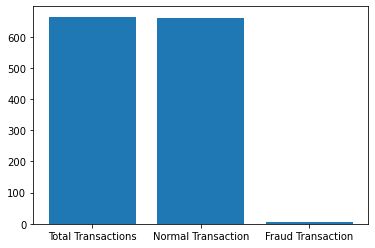

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

C:\Users\radha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the NB model is 0.9924812030075187
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9924812030075187
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9924812030075187
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9924812030075187
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9924812030075187
---------------

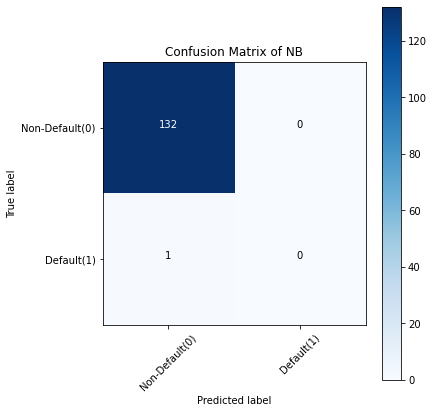

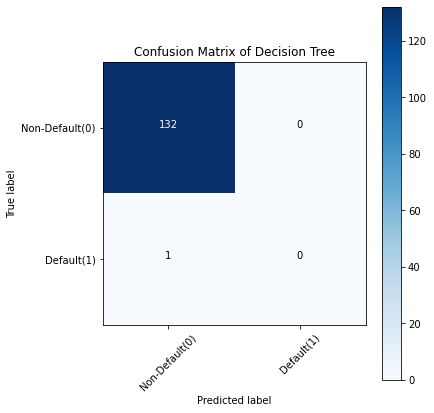

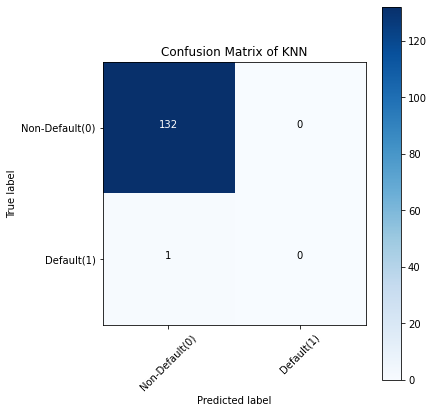

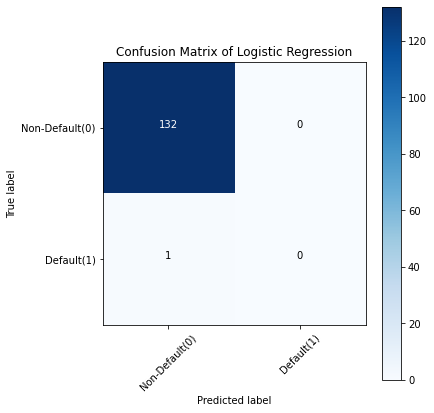

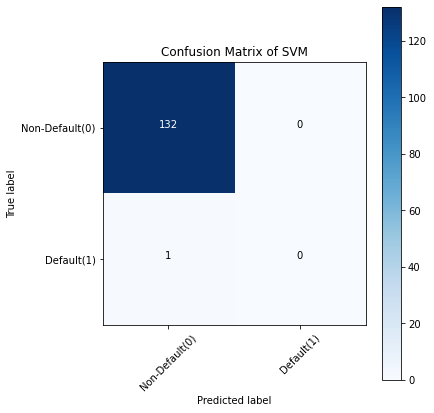

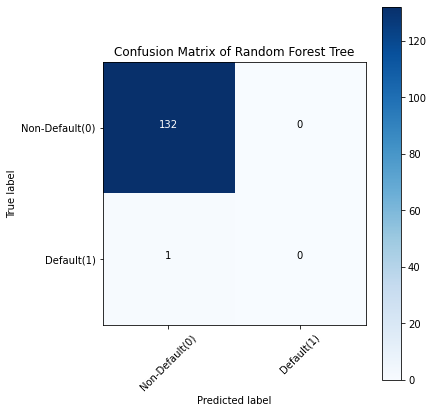

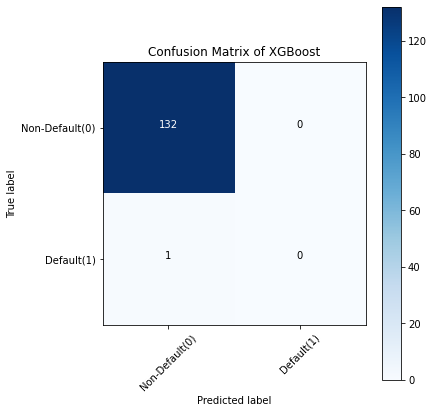

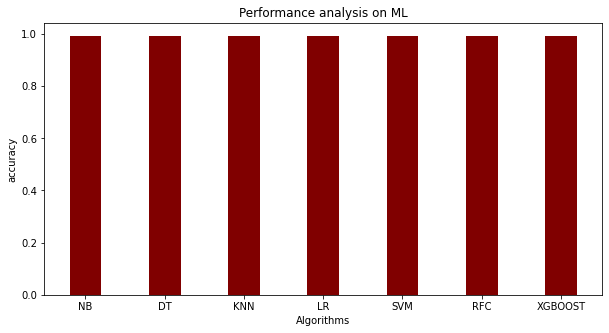

In [7]:
font = ('times', 16, 'bold')
title = Label(main, text='Credit Card Fraud Detection Using Random Forest Tree Based Classifier')
title.config(bg='greenyellow', fg='dodger blue')
title.config(font=font)
title.config(height=3, width=120)
title.place(x=0, y=5)

font1 = ('times', 12, 'bold')
text = Text(main, height=20, width=150)
scroll = Scrollbar(text)
text.configure(yscrollcommand=scroll.set)
text.place(x=50, y=120)
text.config(font=font1)

font1 = ('times', 14, 'bold')
uploadButton = Button(main, text="Upload Credit Card Dataset", command=upload)
uploadButton.place(x=50, y=550)
uploadButton.config(font=font1)

modelButton = Button(main, text="Generate Train & Test Model", command=generateModel)
modelButton.place(x=350, y=550)
modelButton.config(font=font1)

runrandomButton = Button(main, text="Segmentation", command=runRandomForest)
runrandomButton.place(x=650, y=550)
runrandomButton.config(font=font1)

predictButton = Button(main, text="Detect Fraud From Test Data", command=predicts)
predictButton.place(x=50, y=600)
predictButton.config(font=font1)

graphButton = Button(main, text="Analysis", command=graph)
graphButton.place(x=350, y=600)
graphButton.config(font=font1)

exitButton = Button(main, text="Exit", command=exit)
exitButton.place(x=770, y=600)
exitButton.config(font=font1)

main.config(bg='LightSkyBlue')
main.mainloop()
